# Make some plot for a matched catalog

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats

**TO DO:**
- add error bars to the plot

**Questions:**
- are the error bars simply calculated from having lots of catalogs and taking standard deviation?

## Load things

In [89]:
# Pick which catalog
catalog = np.load("../Catalog_Baryon/Catalog_SMF_Iter0_Alpha0.0.npy")
# Pick some things out of the catalog
mh = catalog[:, 0]
ms = catalog[:, 3] # 3rd column corresponds to scatter of 0.16
# Calculate specific mass/halo mass
ratio = np.power(10, ms)/mh

## Bin the catalog and calculate mean values

In [90]:
log_mh = np.log10(mh)
# mh_bins = np.arange(log_mh.min(), log_mh.max(), step=0.2)
mh_bins = np.arange(11.5, 14.5, step=0.2)

# Calculate the binned mean halo mass
hm_binned= scipy.stats.binned_statistic(x=log_mh, values=mh,
                             statistic='mean', bins=mh_bins)
# Calculate the binned mean ratio of specific mass to halo mass
sm_binned = scipy.stats.binned_statistic(x=log_mh, values=ratio,
                                         statistic='mean', bins=mh_bins)

## Plotting the $M-M_h$ relation (for a specific catalog atm)

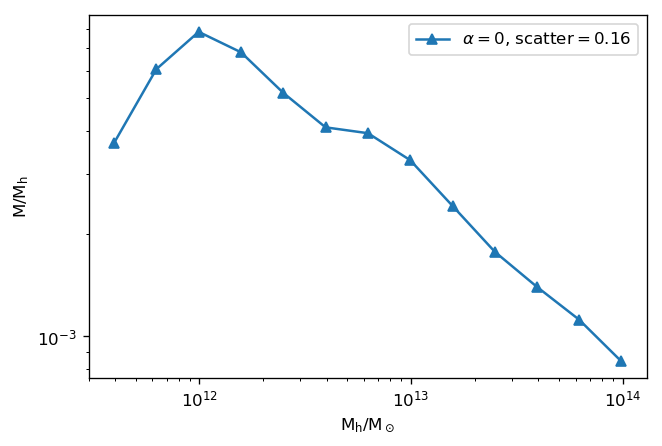

In [100]:
plt.figure(dpi=120)
plt.loglog(hm_binned[0][:-1], sm_binned[0][:-1], marker='^',
          label = r'$\alpha=0$, $\mathrm{scatter}=0.16$')
plt.ylabel(r'$\mathrm{M}/\mathrm{M_h}$')
plt.xlabel(r'$\mathrm{M_h}/\mathrm{M}_\odot$')
plt.legend()
plt.show()